In [1]:
#import library
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('Pokemon.csv')

Proses Menampilkan data

In [3]:
#tampilkan data 5 teratas
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
data.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Data Cleaning

Cek Missing Value

In [7]:
data.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
data = data.drop(columns=['Type 2'])

In [9]:
data.head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False


In [11]:
sebelum_rename = list(data.columns) # Membuat list dari nama kolom dataframe

sesudah_rename = ['id','nama', 'tipe', 'total', 'hp', 'atk', 'def', 'sp_atk', 'sp_def', 'spd','gen','legend']

In [12]:
data = data.rename(columns=dict(zip(sebelum_rename, sesudah_rename))) 

In [13]:
data.head()

,id,nama,tipe,total,hp,atk,def,sp_atk,sp_def,spd,gen,legend
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False


## Data Exploration

<AxesSubplot:title={'center':'Generasi Pokemon'}, ylabel='legend'>

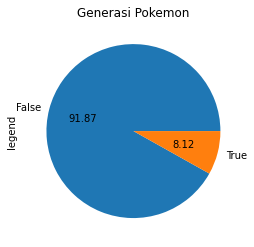

In [23]:
data['legend'].value_counts().plot(kind='pie', autopct='%.2f',title='Generasi Pokemon')

<AxesSubplot:title={'center':'Generasi Pokemon'}, ylabel='None'>

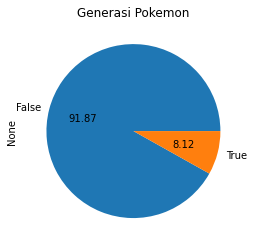

In [25]:
data.groupby('legend').size().plot(kind='pie', autopct='%.2f',title='Generasi Pokemon')

In [93]:
data.groupby(['gen'])[['hp']].max().sort_values(by='gen',ascending=True).plot(kind='bar', title='Most HP MAX ',figsize=(7,7),subplots=True)

,hp,def
gen,,
1,10,5
2,20,10
3,1,20
4,20,5
5,30,30
6,38,33


In [107]:
data[(data['legend']==False)][['nama','spd','atk','hp','def']].sort_values(by=['spd','atk','hp','def'],ascending=False).head()

,nama,spd,atk,hp,def
315,Ninjask,160,90,61,45
154,AerodactylMega Aerodactyl,150,135,80,85
71,AlakazamMega Alakazam,150,50,55,65
19,BeedrillMega Beedrill,145,150,65,40
275,SceptileMega Sceptile,145,110,70,75


In [109]:
def set_condition(row):
    if row["atk"] > row["def"]:
        return "Benar"
    else:
        return "Salah"

databaru = data.assign(kondisi=data.apply(set_condition, axis=1))

databaru.head()

,id,nama,tipe,total,hp,atk,def,sp_atk,sp_def,spd,gen,legend,kondisi
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,Salah
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,Salah
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,Salah
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False,Salah
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,Benar


In [112]:
databaru.groupby('kondisi').size()

kondisi
Benar    433
Salah    367
dtype: int64

In [116]:
def set_condition(row):
    if row["spd"] > row["atk"]:
        return "Cepat"
    else:
        return "Pelan"

databaru = data.assign(kondisi=data.apply(set_condition, axis=1))

databaru.head()

,id,nama,tipe,total,hp,atk,def,sp_atk,sp_def,spd,gen,legend,kondisi
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,Pelan
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,Pelan
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,Pelan
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False,Pelan
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,Cepat


In [117]:
databaru.groupby('kondisi').size()

kondisi
Cepat    279
Pelan    521
dtype: int64

<AxesSubplot:title={'center':'Pokemon tercepat diikuti dengan kerusakan pukulan'}, ylabel='kondisi'>

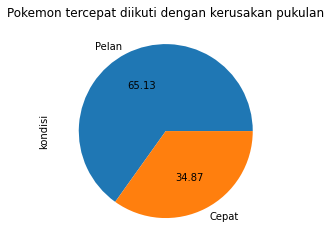

In [118]:
databaru['kondisi'].value_counts().plot(kind='pie', autopct='%.2f',title='Pokemon tercepat diikuti dengan kerusakan pukulan')